In [ ]:
!pip install --upgrade pip


!pip install tensorflow==2.10.0
!pip install numpy==1.21.0
!pip install albumentations==1.1.0

import tensorflow as tf
import numpy as np
import albumentations as A

print("TensorFlow Version:", tf.__version__)
print("NumPy Version:", np.__version__)
print("Albumentations Version:", A.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: Could not find a version that satisfies the requirement tensorflow==2.10.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.10.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 111.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml)

2025-07-20 17:36:15.338502: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753032975.536112      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753032975.602490      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow Version: 2.18.0
NumPy Version: 1.26.4
Albumentations Version: 1.1.0


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

train_image_dir = "/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/Data Dental X_Ray_Panoramic/train/train_images"
valid_image_dir = "/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/Data Dental X_Ray_Panoramic/valid/valid_images"
test_image_dir = "/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/Data Dental X_Ray_Panoramic/Update_Test/test_images"

train_mask_dir = "/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/Data Dental X_Ray_Panoramic/train/train_mask"
valid_mask_dir = "/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/Data Dental X_Ray_Panoramic/valid/valid_mask"
test_mask_dir = "/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/Data Dental X_Ray_Panoramic/Update_Test/test_masks"




print("Train Images:", len(os.listdir(train_image_dir)))
print("Train Mask_Labels:", len(os.listdir(train_mask_dir)))

print("Val Images:", len(os.listdir(valid_image_dir)))
print("Val Mask_Labels:", len(os.listdir(valid_mask_dir)))

print("Test Images:", len(os.listdir(test_image_dir)))
print("Test Mask_Labels:", len(os.listdir(test_mask_dir)))

Train Images: 4772
Train Mask_Labels: 4772
Val Images: 2071
Val Mask_Labels: 2071
Test Images: 1345
Test Mask_Labels: 1345


In [ ]:
import json
def load_json(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    return data


json_path = '/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/train_annotations.coco.json'

data = load_json(json_path)

def parse_json(data):
    categories = {cat['id']: cat['name'] for cat in data['categories']}
    images = {img['id']: img['file_name'] for img in data['images']}

    return categories, images


categories, images = parse_json(data)

print("Categorias:", categories)
print("Imagens:", images)

Categorias: {0: 'vzrad2', 1: 'Caries', 2: 'Crown', 3: 'Filling', 4: 'Implant', 5: 'Malaligned', 6: 'Mandibular Canal', 7: 'Missing teeth', 8: 'Periapical lesion', 9: 'Retained root', 10: 'Root Canal Treatment', 11: 'Root Piece', 12: 'croen', 13: 'impacted tooth', 14: 'maxillary sinus'}
Imagens: {0: '1452650000-jpg_png_jpg.rf.1d73675b99c6c1afe90c2563abd81170.jpg', 1: '3975890000-jpg_png_jpg.rf.1d1b03af3734eba73e9d12a295578027.jpg', 2: '4054820000-jpg_png_jpg.rf.1d4a4d0a6fd081280376d10fc085cffa.jpg', 3: '3794860000-jpg_png_jpg.rf.1cb8e683ddd8a1131d0ffd0c53ee4ac0.jpg', 4: '3867370000-jpg_png_jpg.rf.1d45c92826c5c04734005447c315135f.jpg', 5: '3991400000-jpg_png_jpg.rf.1cb9a4ff2346fb3f9f9291dbf8daf68f.jpg', 6: '4060280000-jpg_png_jpg.rf.1d708069f12e17585d1b58de1233b23a.jpg', 7: 'cropped_GURSEWAK-SINGH_2023-10-20151150_1_png.rf.1cc148ceeb5c08590b94485a57dfccf3.jpg', 8: '4178940000_jpg.rf.1d5b4b1c6650d6db3d1cc311d9e2f8d4.jpg', 9: '4134360000-jpg_png_jpg.rf.1c9e8ed3db514d03432932f572fca6ea.jpg'

In [ ]:
mask_dir = "/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/Data Dental X_Ray_Panoramic/Update_Test/test_masks"

unique_values = set()
for mask_file in os.listdir(mask_dir):
    mask_path = os.path.join(mask_dir, mask_file)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is not None:
        unique = np.unique(mask)
        unique_values.update(unique)
    else:
        print(f"Failed to load: {mask_file}")

print("Unique values across all masks:", unique_values)


Unique values across all masks: {0, 255}


Unique pixel values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 2

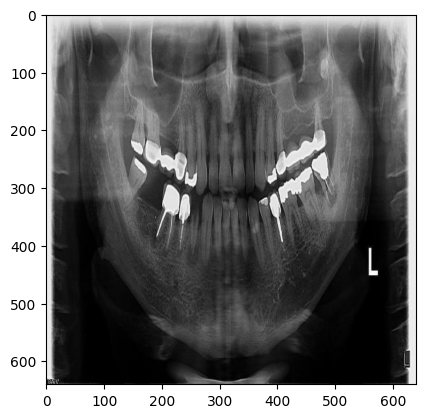

In [ ]:
mask_path = "/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/Data Dental X_Ray_Panoramic/train/train_images/00cf39c1-Karaptiyan_Robert_50yo_13032021_185908_jpg.rf.98b2e72cb9a26e75d40df97e04473ada.jpg"

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)


unique_values = np.unique(mask)
print(f"Unique pixel values: {unique_values}")


plt.imshow(mask, cmap='gray')
plt.show()

Unique pixel values: [  0 255]


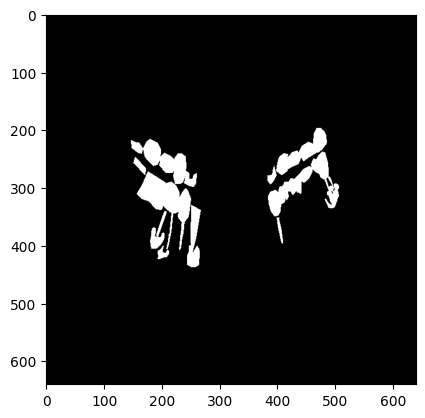

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


mask_path = "/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/Data Dental X_Ray_Panoramic/train/train_mask/00cf39c1-Karaptiyan_Robert_50yo_13032021_185908_jpg.rf.98b2e72cb9a26e75d40df97e04473ada.jpg_mask.png"

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)


unique_values = np.unique(mask)
print(f"Unique pixel values: {unique_values}")


plt.imshow(mask, cmap='gray')
plt.show()

In [ ]:
json_file_path = "/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/train_annotations.coco.json"

with open(json_file_path, 'r') as f:
    data = json.load(f)


categories = data['categories']
print(f"Categories: {categories}")

unique_classes = set()
for ann in data['annotations']:
    unique_classes.add(ann['category_id'])

print(f"Unique classes in annotations: {unique_classes}")

Categories: [{'id': 0, 'name': 'vzrad2', 'supercategory': 'none'}, {'id': 1, 'name': 'Caries', 'supercategory': 'vzrad2'}, {'id': 2, 'name': 'Crown', 'supercategory': 'vzrad2'}, {'id': 3, 'name': 'Filling', 'supercategory': 'vzrad2'}, {'id': 4, 'name': 'Implant', 'supercategory': 'vzrad2'}, {'id': 5, 'name': 'Malaligned', 'supercategory': 'vzrad2'}, {'id': 6, 'name': 'Mandibular Canal', 'supercategory': 'vzrad2'}, {'id': 7, 'name': 'Missing teeth', 'supercategory': 'vzrad2'}, {'id': 8, 'name': 'Periapical lesion', 'supercategory': 'vzrad2'}, {'id': 9, 'name': 'Retained root', 'supercategory': 'vzrad2'}, {'id': 10, 'name': 'Root Canal Treatment', 'supercategory': 'vzrad2'}, {'id': 11, 'name': 'Root Piece', 'supercategory': 'vzrad2'}, {'id': 12, 'name': 'croen', 'supercategory': 'vzrad2'}, {'id': 13, 'name': 'impacted tooth', 'supercategory': 'vzrad2'}, {'id': 14, 'name': 'maxillary sinus', 'supercategory': 'vzrad2'}]
Unique classes in annotations: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13,

In [ ]:
import json
from collections import defaultdict


json_file_path = "/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/train_annotations.coco.json"

with open(json_file_path, 'r') as f:
    data = json.load(f)


image_to_categories = defaultdict(set)

for ann in data['annotations']:
    image_id = ann['image_id']
    category_id = ann['category_id']
    image_to_categories[image_id].add(category_id)


multi_class_images = [img_id for img_id, cats in image_to_categories.items() if len(cats) > 1]
single_class_images = [img_id for img_id, cats in image_to_categories.items() if len(cats) == 1]

print(f"Total images: {len(image_to_categories)}")
print(f"Images with multiple classes (multi-class): {len(multi_class_images)}")
print(f"Images with only one class (single-class): {len(single_class_images)}")


print("Example multi-class image IDs:", multi_class_images[:5])

Total images: 4772
Images with multiple classes (multi-class): 3976
Images with only one class (single-class): 796
Example multi-class image IDs: [0, 1, 2, 3, 4]


In [ ]:
import json
from collections import defaultdict


json_file_path = "/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/valid_annotations.coco.json"

with open(json_file_path, 'r') as f:
    data = json.load(f)


image_to_categories = defaultdict(set)

for ann in data['annotations']:
    image_id = ann['image_id']
    category_id = ann['category_id']
    image_to_categories[image_id].add(category_id)


multi_class_images = [img_id for img_id, cats in image_to_categories.items() if len(cats) > 1]
single_class_images = [img_id for img_id, cats in image_to_categories.items() if len(cats) == 1]

print(f"Total images: {len(image_to_categories)}")
print(f"Images with multiple classes (multi-class): {len(multi_class_images)}")
print(f"Images with only one class (single-class): {len(single_class_images)}")


print("Example multi-class image IDs:", multi_class_images[:5])

Total images: 2071
Images with multiple classes (multi-class): 1641
Images with only one class (single-class): 430
Example multi-class image IDs: [0, 1, 2, 3, 5]


Random image sizes
Size: (640, 640) (Width, Height) - Number of images: 10

All images are the same size.


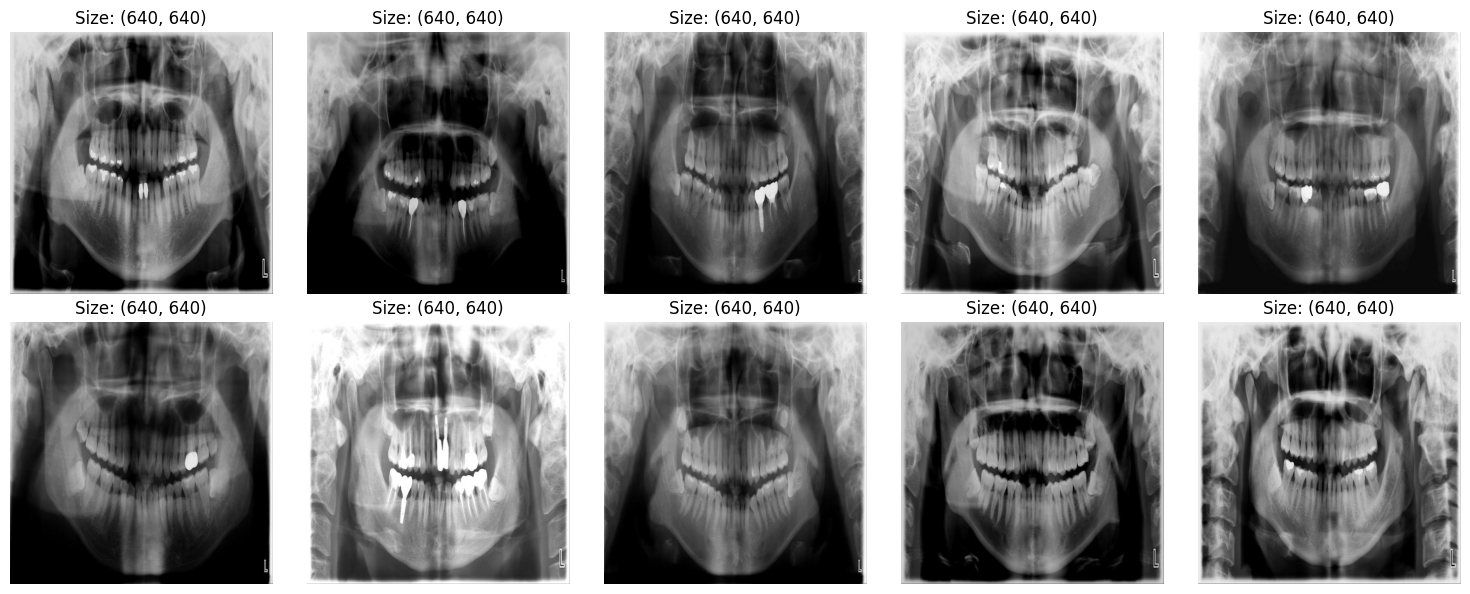

In [ ]:
import json
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
from PIL import Image


train_image_dir = '/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/Data Dental X_Ray_Panoramic/train/train_images'


image_files = os.listdir(train_image_dir)

num_samples = min(10, len(image_files))
sample_images = random.sample(image_files, num_samples)


image_sizes = {}


for image_filename in sample_images:
    image_path = os.path.join(train_image_dir, image_filename)
    try:
        with Image.open(image_path) as img:

            img = img.convert('RGB')

            size = img.size
            if size in image_sizes:
                image_sizes[size] += 1
            else:
                image_sizes[size] = 1
    except Exception as e:
        print(f"Error loading {image_filename}: {e}")
        continue


print("Random image sizes")
for size, count in image_sizes.items():
    print(f"Size: {size} (Width, Height) - Number of images: {count}")


if len(image_sizes) > 1:
    print("\nImages have different sizes!")
else:
    print("\nAll images are the same size.")


fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()
for i, image_filename in enumerate(sample_images[:10]):
    image_path = os.path.join(train_image_dir, image_filename)
    try:
        with Image.open(image_path) as img:
            img = img.convert('RGB')
            axes[i].imshow(img)
            axes[i].set_title(f"Size: {img.size}")
            axes[i].axis('off')
    except Exception as e:
        print(f"Error displaying {image_filename}: {e}")
        axes[i].axis('off')
plt.tight_layout()
plt.show()

Images shape: (8, 256, 256, 3)
Masks shape: (8, 256, 256, 1)
Unique mask values: [0. 1.]


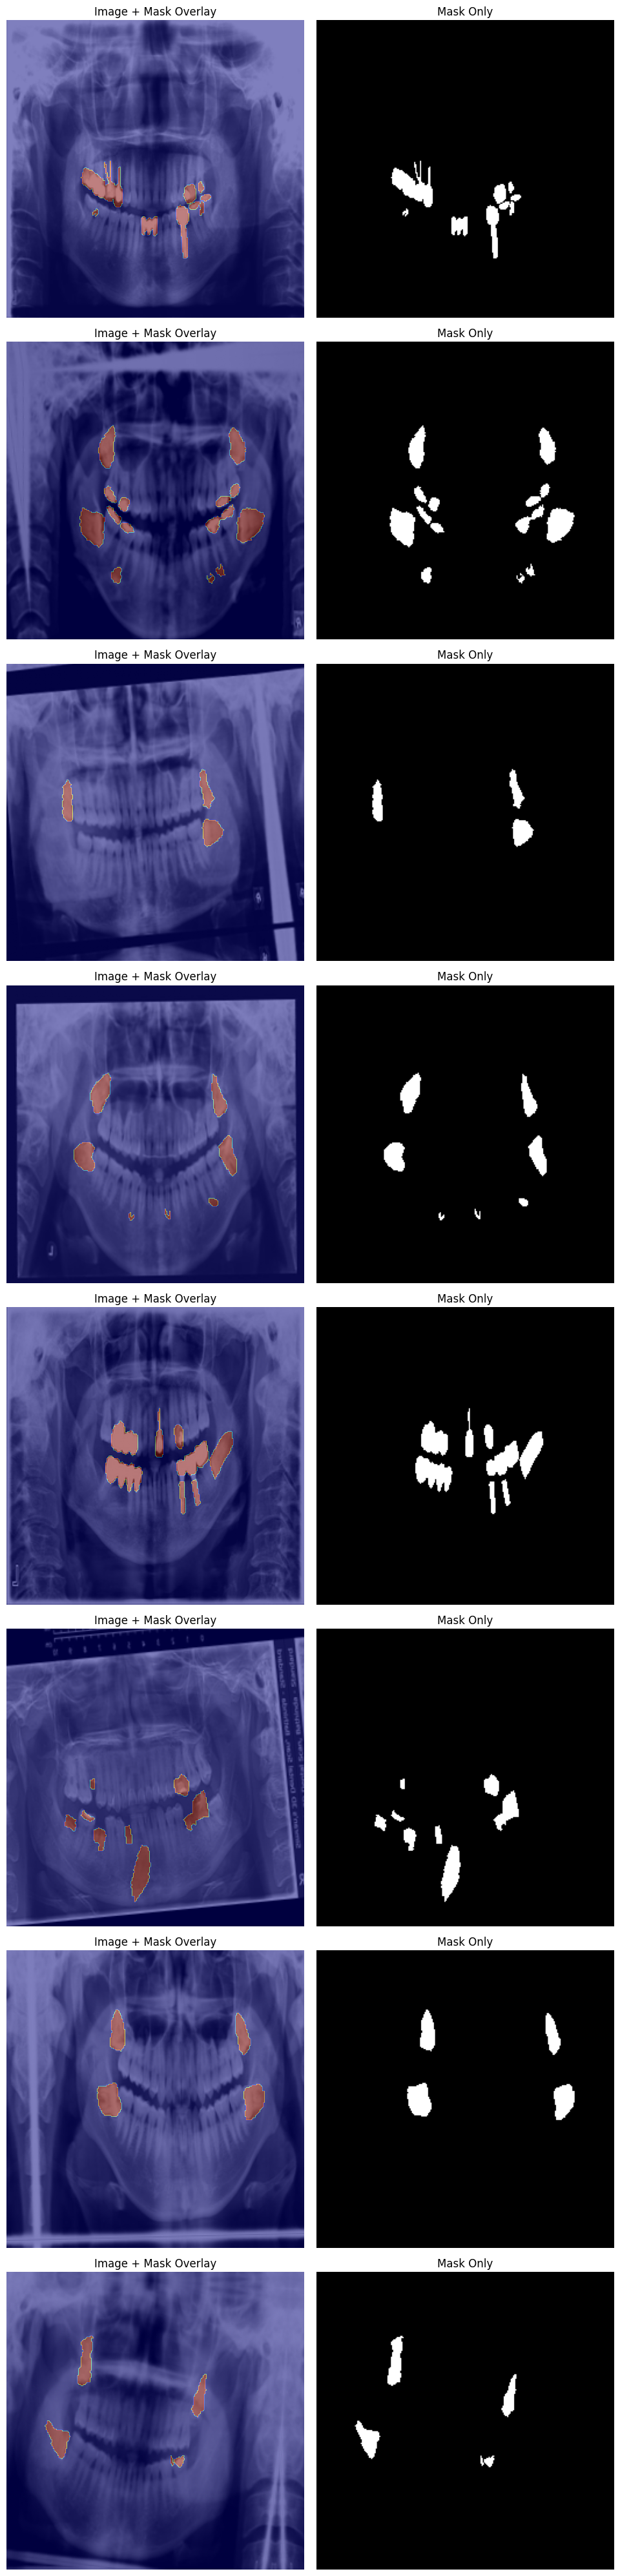

Training steps per epoch: 597
Validation steps per epoch: 259


In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from PIL import Image
import albumentations as A

# Load annotations with error handling
def load_annotations(json_path):
    with open(json_path, 'r') as f:
        annotations = json.load(f)
    return annotations

# Load image and mask
def load_image_and_mask(image_path, mask_path, target_size=(256, 256)):
    try:
        image = Image.open(image_path).convert('RGB')
        mask = Image.open(mask_path).convert('L')
        image = image.resize(target_size, Image.Resampling.LANCZOS)
        mask = mask.resize(target_size, Image.Resampling.LANCZOS)
        image = np.array(image) / 255.0  # Normalize image
        mask = np.array(mask) / 255.0  # Normalize mask
        mask = (mask > 0.5).astype(np.float32)  # Convert to binary
        mask = np.expand_dims(mask, axis=-1)  # Add channel dimension: [256,256] -> [256,256,1]
        return image, mask
    except FileNotFoundError:
        print(f"Error: File not found - {image_path} or {mask_path}")
        return None, None

# Visualize a batch of images and masks with overlay
def visualize_batch(images, masks):
    if len(images) == 0 or len(masks) == 0:
        print("Error: No images or masks to visualize.")
        return
    if len(images) != len(masks):
        print("Error: Number of images and masks do not match.")
        return
    batch_size = len(images)
    fig, axes = plt.subplots(batch_size, 2, figsize=(10, batch_size * 5))
    if batch_size == 1:
        axes = [axes]  # Fix for single image case
    for i in range(batch_size):
        # First column: Image + Mask Overlay
        ax_image = axes[i, 0] if batch_size > 1 else axes[0][0]
        ax_image.imshow(images[i])  # Show the original image
        ax_image.imshow(masks[i], cmap='jet', alpha=0.5)  # Overlay the mask with transparency
        ax_image.axis('off')
        ax_image.set_title('Image + Mask Overlay')

        # Second column: Mask Only
        ax_mask = axes[i, 1] if batch_size > 1 else axes[0][1]
        ax_mask.imshow(masks[i], cmap='gray')
        ax_mask.axis('off')
        ax_mask.set_title('Mask Only')

    plt.tight_layout()
    plt.show()


# Data Augmentation
transform = A.Compose([
    A.HorizontalFlip(p=0.7),
    A.Rotate(limit=5, p=0.7),
    A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.3),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=10, p=0.5),
    A.GaussNoise(p=0.1),
])

# Dataset generator with augmentation
def dataset_generator(image_dir, mask_dir, annotations, batch_size, target_size=(256, 256)):
    image_info = annotations['images']
    while True:
        np.random.shuffle(image_info)
        for batch_start in range(0, len(image_info), batch_size):
            images = []
            masks = []
            for i in range(batch_start, min(batch_start + batch_size, len(image_info))):
                image_data = image_info[i]
                image_filename = image_data['file_name']
                image_path = os.path.join(image_dir, image_filename)
                mask_filename = f"{image_filename}_mask.png"
                mask_path = os.path.join(mask_dir, mask_filename)
                try:
                    image, mask = load_image_and_mask(image_path, mask_path, target_size)
                    if image is None or mask is None:
                        continue
                    # Convert to uint8 for augmentation (scale back to 0-255)
                    image_uint8 = (image * 255).astype(np.uint8)
                    mask_uint8 = (mask * 255).astype(np.uint8)
                    # Apply augmentation
                    augmented = transform(image=image_uint8, mask=mask_uint8)
                    image = augmented['image'] / 255.0  # Normalize back to 0-1
                    mask = augmented['mask'] / 255.0  # Normalize back to 0-1
                    mask = (mask > 0.5).astype(np.float32)  # Threshold to binary
                    if len(mask.shape) == 2:  # Ensure mask has channel dimension
                        mask = np.expand_dims(mask, axis=-1)  # [256,256] -> [256,256,1]
                    images.append(image)
                    masks.append(mask)
                except (FileNotFoundError, ValueError) as e:
                    print(f"Error loading image or mask: {e}")
                    continue
            if len(images) == 0:
                print("Warning: Empty batch, skipping...")
                continue
            yield np.array(images), np.array(masks)


# Define paths and variables
input_shape = (256, 256, 3)
batch_size = 8

train_image_dir = '/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/Data Dental X_Ray_Panoramic/train/train_images'
train_mask_dir = '/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/Data Dental X_Ray_Panoramic/train/train_mask'
train_annotation_file = '//kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/train_annotations.coco.json'

valid_image_dir = '/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/Data Dental X_Ray_Panoramic/valid/valid_images'
valid_mask_dir = '/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/Data Dental X_Ray_Panoramic/valid/valid_mask'
valid_annotation_file = '/kaggle/input/dental-x-raypanoramic-semanticsegmentation-task/Dental segmentation_X-ray panoramic/valid_annotations.coco.json'


# Load annotations
train_annotations = load_annotations(train_annotation_file)
valid_annotations = load_annotations(valid_annotation_file)

# Create data generators
train_data_gen = dataset_generator(train_image_dir, train_mask_dir, train_annotations, batch_size=batch_size)
valid_data_gen = dataset_generator(valid_image_dir, valid_mask_dir, valid_annotations, batch_size=batch_size)

# Test the generator
images, masks = next(train_data_gen)
print("Images shape:", images.shape)
print("Masks shape:", masks.shape)
print("Unique mask values:", np.unique(masks))  # Binary masks

# Visualize the batch
visualize_batch(images, masks)

# Calculate steps per epoch
train_steps_per_epoch = int(np.ceil(len(train_annotations['images']) / batch_size))
valid_steps_per_epoch = int(np.ceil(len(valid_annotations['images']) / batch_size))

print(f"Training steps per epoch: {train_steps_per_epoch}")
print(f"Validation steps per epoch: {valid_steps_per_epoch}")